In [176]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import random
import sys
import glob
from PIL import Image,ImageChops,ImageFilter
import re

In [177]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [178]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

def plot_rocauc(gt_list,scores2):
    fig, ax = plt.subplots(ncols=1, figsize=(5,5),dpi=100, facecolor='w',edgecolor='k')
    fpr , tpr , thresholds = roc_curve(gt_list, scores2, drop_intermediate=False, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    rd_x = [0,1]
    rd_y = [0,1]
    ax.plot(fpr, tpr, c='r', marker="o", markersize=4,linestyle='dashed',linewidth = 1.0,label='Image level (AUC = %.2f)'%auc)
    ax.fill_between(fpr, tpr, color="r", alpha=0.2)
    ax.vlines(fpr[1], 0, tpr[1], "black", linestyles='dashed',linewidth = 0.5, alpha = 0.5)  
    ax.plot(rd_x, rd_y, c='black', linestyle='dashed',linewidth = 1.0,label="chance level (AUC = 0.50)")
    f = ax.legend(loc= 'lower right', frameon=True, edgecolor='black')
    f.get_frame().set_facecolor('white')
    f.get_frame().set_alpha(1)
    ax.title.set_text('Average image ROCAUC')
    ax.set_xlabel('False Positive Rate', fontsize= 15)
    ax.set_ylabel('True Positive Rate', fontsize= 15)
    ax.grid(which = "major", axis = "both", color = "black", alpha = 0.5, linestyle = "--", linewidth = 0.5)
    ax.axis([-0.01,1.01,-0.01,1.01])   #x,y軸の範囲を指定 
    ax.set_xticks(np.arange(0.0, 1.01, 0.1))
    ax.set_yticks(np.arange(0.0, 1.01, 0.1))
    plt.show()

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.metrics import accuracy_score

def plot_precision_recall_vs_threshold(y_true, y_score, figsize=(8, 6), num_xticks=10,size=2,n=1000,normalize =True):
    if normalize==True:
        max_score = y_score.max()
        min_score = y_score.min()
        y_score = (y_score - min_score) / (max_score - min_score)
        
    precision, recall, thresholds = precision_recall_curve(y_true, y_score,sample_weight=None, pos_label=None)
    f1 = 2 * (precision * recall) / (precision + recall)
    for i in range(len(f1)):
        if np.isnan(f1[i]):
            f1[i] = 0
    fig, ax = plt.subplots(figsize=figsize)
    accuracy = [[thresholds[i],accuracy_score(y_true, y_score >= thresholds[i])] for i in range (0,len(thresholds),n)]
    ax.plot([i[0] for i in accuracy], [i[1] for i in accuracy], 'yo--',markersize=size, label='Accuracy')
    ax.plot(thresholds, precision[:-1],'bo--',markersize=size, label='Precision')
    ax.plot(thresholds, recall[:-1], 'go--',markersize=size, label='Recall')
    ax.plot(thresholds, f1[:-1], 'ro--',markersize=size, label='F1-score')
    ax.legend()
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Score')
    ax.set_xlim([0, max(thresholds)+0.1])
    ax.set_ylim([0, 1.01])
    max_f1_idx = np.argmax(f1)
    max_f1_threshold = thresholds[max_f1_idx]
    ax.axvline(x=max_f1_threshold, linestyle='--', color='black', label=f'F1-max ({max_f1_threshold:.2f})')    
    ax.grid(True)
    # x軸ラベルを設定
    xtick_locs = np.linspace(0, len(thresholds)-1, num_xticks, dtype=int)
    ax.set_xticks(thresholds[xtick_locs])
    ax.set_xticklabels(thresholds[xtick_locs].round(2),rotation=45)

    # 点線の位置にx軸の値を表示する
    ax.text(max_f1_threshold,1.05, f"{max_f1_threshold:.2f}", ha="center",va ="top")
    dic ={}
    for i in range(len(thresholds)):
         dic[2,thresholds[i]] =[precision[i],recall[i],f1[i]]              

    return fig, ax,accuracy,dic

In [180]:
cd 

C:\Users\SG\Desktop\20230222


In [258]:
gt_list = np.load("./SPADE-pytorch/flatten_gt_mask_list.npy")
score_list = np.load("./SPADE-pytorch/flatten_score_map_list.npy")

C:\Users\SG\AppData\Local\Temp\ipykernel_15100\816324375.py:13: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2 * (precision * recall) / (precision + recall)


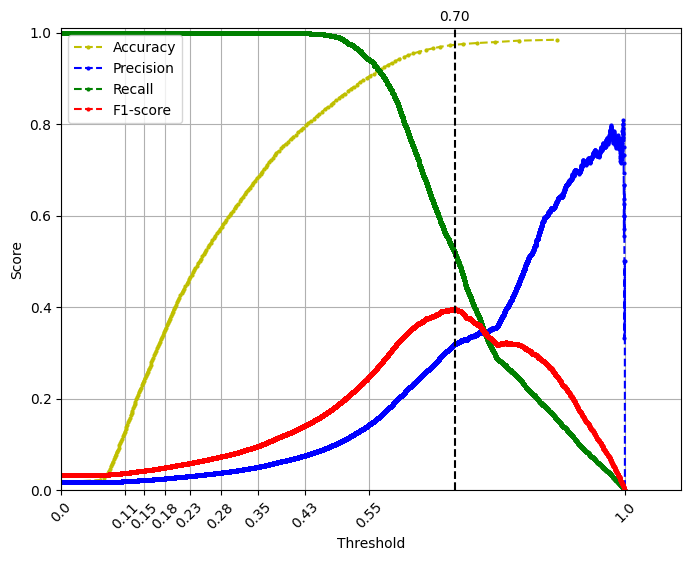

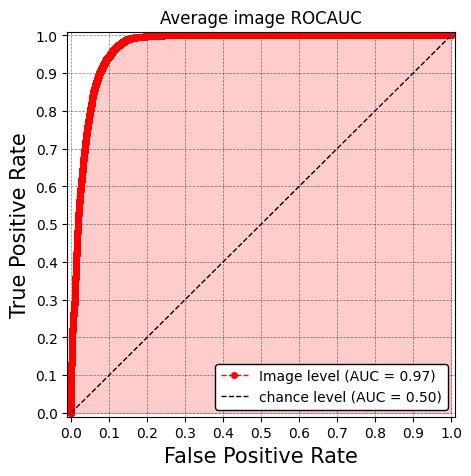

In [259]:
fig, ax,accuracy,d=plot_precision_recall_vs_threshold(gt_list, score_list)
plot_rocauc(gt_list, score_list)

In [219]:
m = max([v[2] for k,v in d.items()])
kk =[k for k,v in d.items() if v[2]==m]
kk[0],d[kk[0]]

(2.988061, [0.32070291048874244, 0.5203445203445204, 0.3968289920724802])

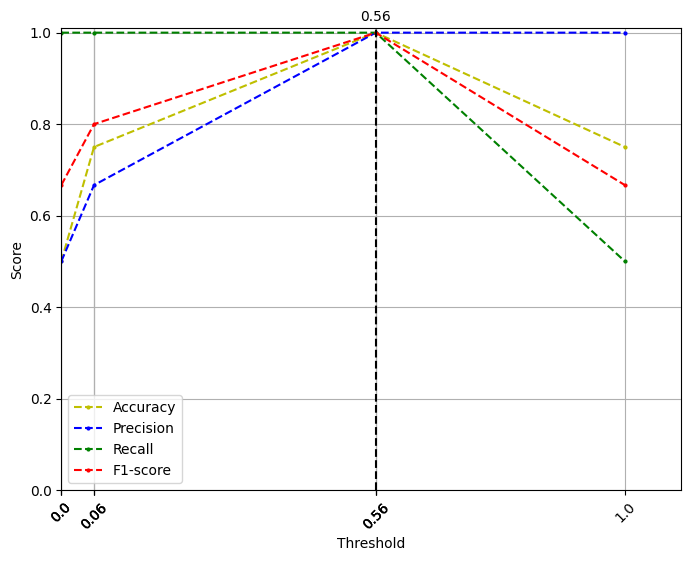

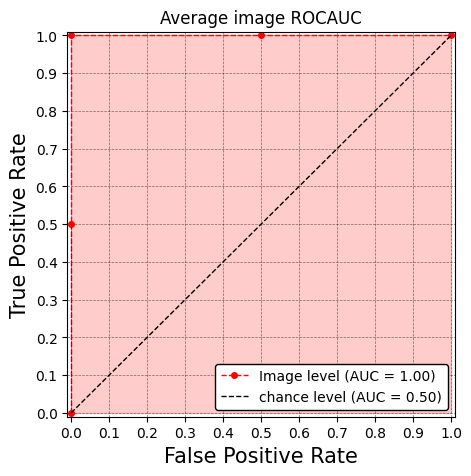

In [261]:
gt_list =np.array([1,1,0,0])
score_list = np.array([13.167526,9.727718,5.3866477,5.8384843])
fig, ax,accuracy,d=plot_precision_recall_vs_threshold(gt_list, score_list,n=1)
plot_rocauc(gt_list, score_list)

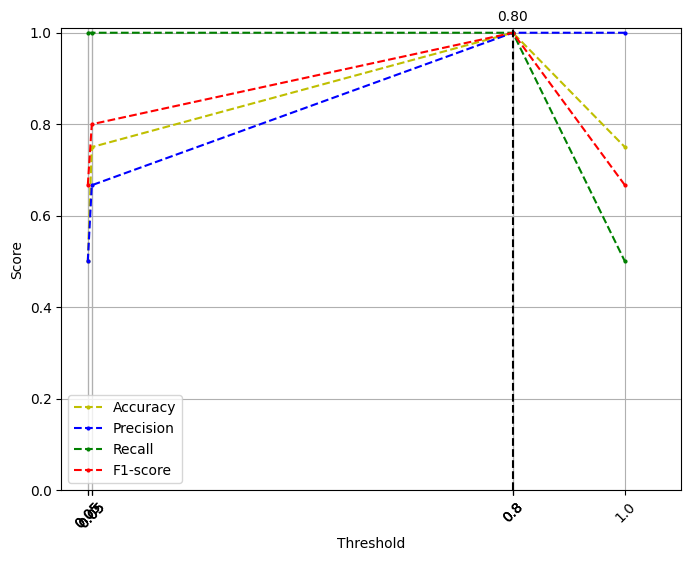

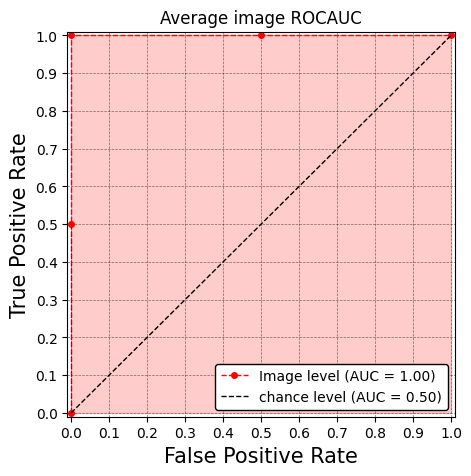

In [263]:
gt_list = np.load("./PaDiM-Anomaly-Detection-Localization-master/gt_img.npy")
score_list = np.load("./PaDiM-Anomaly-Detection-Localization-master/img_scores.npy")
fig, ax,accuracy,d=plot_precision_recall_vs_threshold(gt_list, score_list,n=1,normalize=False)
plot_rocauc(gt_list, score_list)

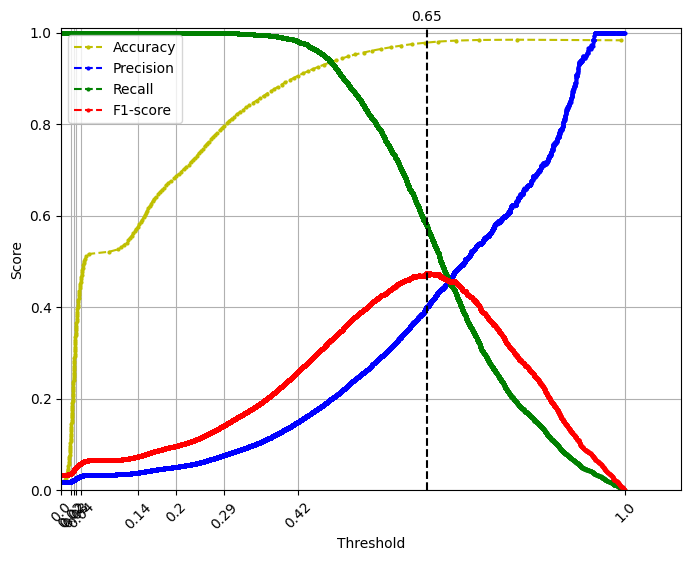

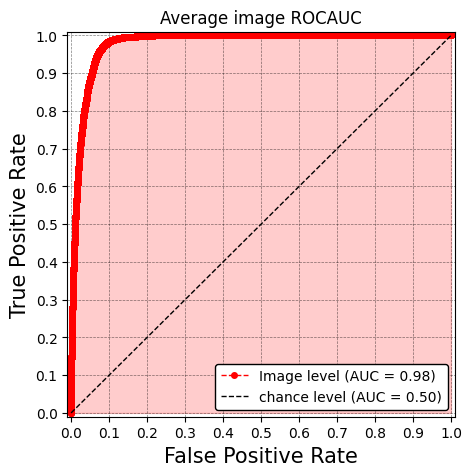

In [265]:
gt_list = np.load("./PaDiM-Anomaly-Detection-Localization-master/gt_pixel.npy")
score_list = np.load("./PaDiM-Anomaly-Detection-Localization-master/pixel_scores.npy")
fig, ax,accuracy,d=plot_precision_recall_vs_threshold(gt_list, score_list,n=1000,normalize=False)
plot_rocauc(gt_list, score_list)

In [ ]:
gtのある画像だけ、ピクセル単位での精度を算出できる

画像単位のROCAUC
ピクセル単位のROCAUC


異常度の閾値は、f1スコアが一番高いときに設定している

ピクセル単位で